In [2]:
from fastai.vision import *

In [3]:
path = Path('../data/')
classes = ['cricket', 'baseball', 'badminton']
classes

['cricket', 'baseball', 'badminton']

### Creating empty directories to store images

In [4]:
[(path/class_).mkdir(parents=True, exist_ok=True) for class_ in classes]

[None, None, None]

In [5]:
path.ls()

[PosixPath('../data/baseball.txt'),
 PosixPath('../data/baseball'),
 PosixPath('../data/badminton'),
 PosixPath('../data/badminton.txt'),
 PosixPath('../data/cricket'),
 PosixPath('../data/cricket.txt')]

### Downloading images

In [6]:
[download_images(str(path)+'/'+class_+'.txt', path/class_, max_pics=200) for class_ in classes]

Error https://www.rehmanisports.com/wp-content/uploads/2016/08/IMG_3182.jpg HTTPSConnectionPool(host='www.rehmanisports.com', port=443): Read timed out. (read timeout=4)
Error https://store.slazenger.com/images/products/85100190_l_a1.jpg HTTPSConnectionPool(host='store.slazenger.com', port=443): Read timed out. (read timeout=4)


[None, None, None]

### Remove corrupted images

In [7]:
[verify_images(str(path)+'/'+class_, delete=True, max_size=500) for class_ in classes]

Image ../data/cricket/00000064.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/cricket/00000036.jpg'>
cannot identify image file <_io.BufferedReader name='../data/cricket/00000089.jpg'>


/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='../data/baseball/00000089.jpg'>
cannot identify image file <_io.BufferedReader name='../data/baseball/00000029.png'>


cannot identify image file <_io.BufferedReader name='../data/badminton/00000086.jpg'>
Image ../data/badminton/00000013.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/badminton/00000099.jpg'>


[None, None, None]

### View downloaded data

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['badminton', 'baseball', 'cricket']

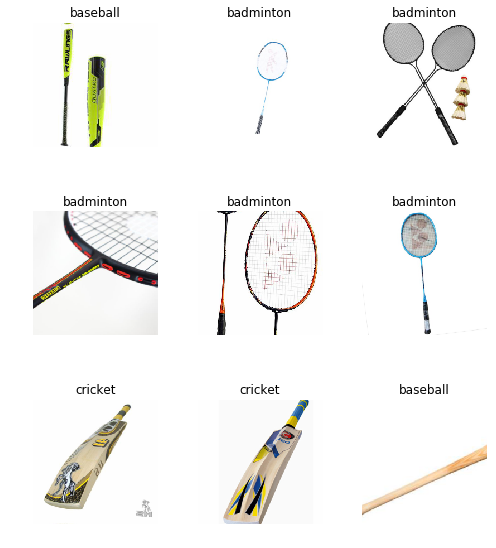

In [10]:
data.show_batch(rows=3, figsize=(7,8))

### Train Model

In [11]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ubuntu/.torch/models/resnet34-333f7ec4.pth
87306240it [00:10, 8012880.86it/s] 


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.375956,0.756204,0.333333
2,0.951513,0.260059,0.087719
3,0.687300,0.191570,0.087719
4,0.538535,0.176722,0.087719


In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-06


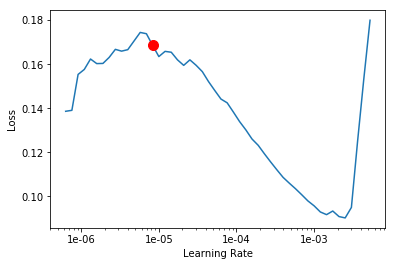

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate
1,0.136713,0.144126,0.052632
2,0.107616,0.147995,0.052632


In [18]:
learn.save('stage-2')

### Interpretation

In [19]:
learn.load('stage-2');

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

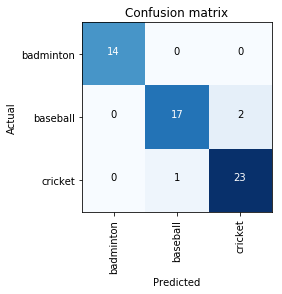

In [21]:
interp.plot_confusion_matrix()

### Cleaning the data

In [22]:
from fastai.widgets import *

In [23]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [24]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [25]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [26]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())